In [111]:
import quandl
from api_keys import api_key_UN
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats
from pprint import pprint

quandl.ApiConfig.api_key = api_key_UN

#UN_data = quandl.get('UGEN/TBIR_USA')
UN_data = pd.DataFrame(quandl.get('UGEN/UNEM_USA', returns="numpy")) #UNEMPLOYMENT

UN_data.shape

#What we can talk about: growth of unemployment in each age group (as a total), age group broken down by gender

(21, 11)

In [60]:
#EMPLOYMENT
UN_employ = pd.DataFrame(quandl.get('UGEN/EMPL_USA'))
UN_employ

#labour force participation in each age group for women/men
#labour force participation for female (in each age group) 
#labour force participation for male (in each age group)
#employment rate vs gender (break it down by age group) - How is the employment rate changing over age over time.

#Hypothesis: employment would increase for women

#employment for men would be high at the start and increase from then on


,% Employed - Female 15+ yr (Percent),% Employed - Female 15-24 yr (Percent),% Employed - Male 15+ yr (Percent),% Employed - Male 15-24 yr (Percent),Labour Force Participation - Female 15+ yr (Percent),Labour Force Participation - Female 15-24 yr (Percent),Labour Force Participation - Female 15-64 yr (Percent),Labour Force Participation - Female 25-34 yr (Percent),Labour Force Participation - Female 25-54 yr (Percent),Labour Force Participation - Female 35-54 yr (Percent),Labour Force Participation - Female 55-64 yr (Percent),Labour Force Participation - Female 65+ yr (Percent),Labour Force Participation - Male 15+ yr (Percent),Labour Force Participation - Male 15-24 yr (Percent),Labour Force Participation - Male 15-64 yr (Percent),Labour Force Participation - Male 25-34 yr (Percent),Labour Force Participation - Male 25-54 yr (Percent),Labour Force Participation - Male 35-54 yr (Percent),Labour Force Participation - Male 55-64 yr (Percent),Labour Force Participation - Male 65+ yr (Percent)
Date,,,,,,,,,,,,,,,,,,,,
1985-12-31,NaN,NaN,NaN,NaN,54.2,62.7,63.9,70.9,69.6,68.7,41.9,7.3,76.2,71.8,84.8,94.7,93.9,93.4,68.0,15.8
1986-12-31,NaN,NaN,NaN,NaN,55.0,63.4,64.9,71.6,70.8,70.1,42.2,7.4,76.1,72.1,84.9,94.6,93.8,93.2,67.2,16.0
1987-12-31,NaN,NaN,NaN,NaN,55.7,63.8,65.9,72.4,71.9,71.5,42.6,7.4,76.1,71.6,84.9,94.6,93.7,93.1,67.5,16.3
1988-12-31,NaN,NaN,NaN,NaN,56.3,63.7,66.6,72.8,72.7,72.7,43.4,7.9,76.1,71.7,85.0,94.3,93.6,93.1,67.0,16.5
1989-12-31,NaN,NaN,NaN,NaN,57.1,63.6,67.6,73.5,73.7,73.8,45.0,8.4,76.3,72.2,85.4,94.4,93.7,93.2,67.2,16.6
1990-12-31,NaN,NaN,NaN,NaN,57.0,61.9,67.5,73.4,74.0,74.3,45.3,8.6,75.9,70.6,85.1,94.1,93.4,92.9,67.8,16.3
1991-12-31,53.2,53.0,69.9,59.1,56.9,60.4,67.4,73.1,74.0,74.7,45.3,8.5,75.3,68.8,84.5,93.6,93.1,92.7,67.1,15.7
1992-12-31,53.3,52.5,69.4,58.3,57.3,60.3,68.0,73.9,74.6,75.0,46.6,8.3,75.3,68.8,84.6,93.8,93.0,92.5,67.1,16.1
1993-12-31,53.6,53.2,69.6,58.8,57.4,60.6,68.2,73.4,74.6,75.3,47.2,8.1,74.9,68.5,84.2,93.4,92.6,92.0,66.6,15.6


In [61]:
UN_employ.columns

Index(['% Employed - Female 15+ yr (Percent)',
       '% Employed - Female 15-24 yr (Percent)',
       '% Employed - Male 15+ yr (Percent)',
       '% Employed - Male 15-24 yr (Percent)',
       'Labour Force Participation - Female 15+ yr (Percent)',
       'Labour Force Participation - Female 15-24 yr (Percent)',
       'Labour Force Participation - Female 15-64 yr (Percent)',
       'Labour Force Participation - Female 25-34 yr (Percent)',
       'Labour Force Participation - Female 25-54 yr (Percent)',
       'Labour Force Participation - Female 35-54 yr (Percent)',
       'Labour Force Participation - Female 55-64 yr (Percent)',
       'Labour Force Participation - Female 65+ yr (Percent)',
       'Labour Force Participation - Male 15+ yr (Percent)',
       'Labour Force Participation - Male 15-24 yr (Percent)',
       'Labour Force Participation - Male 15-64 yr (Percent)',
       'Labour Force Participation - Male 25-34 yr (Percent)',
       'Labour Force Participation - Male 25-5

In [68]:
#UN_employ.info()

#Dropping unnecessary tables
US_employ = UN_employ.drop(columns = ['% Employed - Female 15+ yr (Percent)','% Employed - Female 15-24 yr (Percent)','% Employed - Male 15+ yr (Percent)','% Employed - Male 15-24 yr (Percent)'], axis=1)


In [69]:
US_employ.mean()

Labour Force Participation - Female 15+ yr (Percent)      58.013636
Labour Force Participation - Female 15-24 yr (Percent)    61.331818
Labour Force Participation - Female 15-64 yr (Percent)    68.577273
Labour Force Participation - Female 25-34 yr (Percent)    74.386364
Labour Force Participation - Female 25-54 yr (Percent)    74.895455
Labour Force Participation - Female 35-54 yr (Percent)    75.122727
Labour Force Participation - Female 55-64 yr (Percent)    49.472727
Labour Force Participation - Female 65+ yr (Percent)       8.872727
Labour Force Participation - Male 15+ yr (Percent)        74.731818
Labour Force Participation - Male 15-24 yr (Percent)      67.750000
Labour Force Participation - Male 15-64 yr (Percent)      83.631818
Labour Force Participation - Male 25-34 yr (Percent)      93.313636
Labour Force Participation - Male 25-54 yr (Percent)      92.195455
Labour Force Participation - Male 35-54 yr (Percent)      91.563636
Labour Force Participation - Male 55-64 yr (Perc

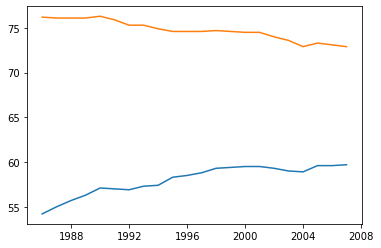

In [71]:
#Plot Data
#
fig, ax = plt.subplots()

ax.plot(US_employ.index, US_employ['Labour Force Participation - Female 15+ yr (Percent)'])
ax.plot(US_employ.index, US_employ['Labour Force Participation - Male 15+ yr (Percent)'])

plt.show()

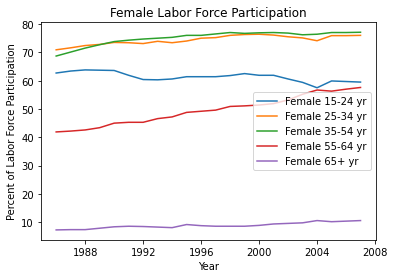

In [79]:
fig, ax = plt.subplots()

ax.plot(US_employ.index, US_employ['Labour Force Participation - Female 15-24 yr (Percent)'], label = 'Female 15-24 yr')
ax.plot(US_employ.index, US_employ['Labour Force Participation - Female 25-34 yr (Percent)'], label = 'Female 25-34 yr')
ax.plot(US_employ.index, US_employ['Labour Force Participation - Female 35-54 yr (Percent)'], label = 'Female 35-54 yr')
ax.plot(US_employ.index, US_employ['Labour Force Participation - Female 55-64 yr (Percent)'], label = 'Female 55-64 yr')
ax.plot(US_employ.index, US_employ['Labour Force Participation - Female 65+ yr (Percent)'], label = 'Female 65+ yr')
ax.set_xlabel("Year")
ax.set_ylabel("Percent of Labor Force Participation")
ax.set_title("Female Labor Force Participation")
ax.legend()
plt.show()

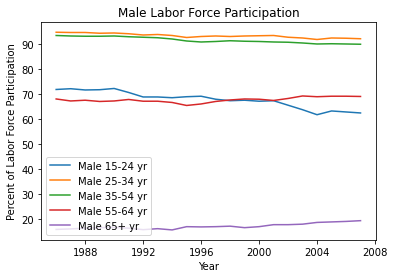

In [80]:
fig, ax = plt.subplots()

ax.plot(US_employ.index, US_employ['Labour Force Participation - Male 15-24 yr (Percent)'], label = 'Male 15-24 yr')
ax.plot(US_employ.index, US_employ['Labour Force Participation - Male 25-34 yr (Percent)'], label = 'Male 25-34 yr')
ax.plot(US_employ.index, US_employ['Labour Force Participation - Male 35-54 yr (Percent)'], label = 'Male 35-54 yr')
ax.plot(US_employ.index, US_employ['Labour Force Participation - Male 55-64 yr (Percent)'], label = 'Male 55-64 yr')
ax.plot(US_employ.index, US_employ['Labour Force Participation - Male 65+ yr (Percent)'], label = 'Male 65+ yr')
ax.set_xlabel("Year")
ax.set_ylabel("Percent of Labor Force Participation")
ax.set_title("Male Labor Force Participation")
ax.legend()
plt.show()

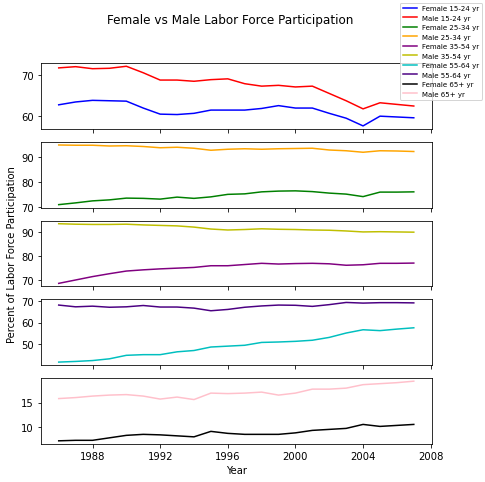

In [121]:
fig, ax = plt.subplots(5,1,sharex=True,figsize=(7,7))

ax[0].plot(US_employ.index, US_employ['Labour Force Participation - Female 15-24 yr (Percent)'], color='b', label = 'Female 15-24 yr')
ax[0].plot(US_employ.index, US_employ['Labour Force Participation - Male 15-24 yr (Percent)'], color='r', label = 'Male 15-24 yr')

ax[1].plot(US_employ.index, US_employ['Labour Force Participation - Female 25-34 yr (Percent)'], color='g', label = 'Female 25-34 yr')
ax[1].plot(US_employ.index, US_employ['Labour Force Participation - Male 25-34 yr (Percent)'], color ='orange' , label = 'Male 25-34 yr')

ax[2].plot(US_employ.index, US_employ['Labour Force Participation - Female 35-54 yr (Percent)'], color='purple' , label = 'Female 35-54 yr')
ax[2].plot(US_employ.index, US_employ['Labour Force Participation - Male 35-54 yr (Percent)'],color = 'y' , label = 'Male 35-54 yr')

ax[3].plot(US_employ.index, US_employ['Labour Force Participation - Female 55-64 yr (Percent)'], color = 'c' ,label = 'Female 55-64 yr')
ax[3].plot(US_employ.index, US_employ['Labour Force Participation - Male 55-64 yr (Percent)'], color = 'indigo', label = 'Male 55-64 yr')

ax[4].plot(US_employ.index, US_employ['Labour Force Participation - Female 65+ yr (Percent)'], color = 'k', label = 'Female 65+ yr')
ax[4].plot(US_employ.index, US_employ['Labour Force Participation - Male 65+ yr (Percent)'], color = 'pink' , label = 'Male 65+ yr')

ax[4].set_xlabel("Year")
ax[2].set_ylabel("Percent of Labor Force Participation")
fig.suptitle("Female vs Male Labor Force Participation")
fig.legend(loc=1, prop={'size':7})
plt.show()
